# Procesamiento de Imágenes - Trabajo Práctico N°2
## Grupo 3
* Santiago Arribere
* Matías Francois
* Joaquín Gaytan
* Pablo Scheinfeld

## Ejercicio 1

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Incialmente cargamos la imagen en escala de grises

In [2]:
original_image = np.array(Image.open('../../assets/flower.bmp'))

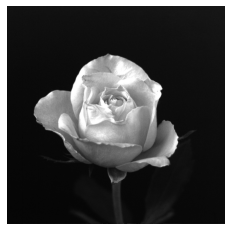

In [3]:
plt.axis('off')
plt.imshow(original_image, cmap='gray')

Se procede a retirar intercaladamente filas y columnas de forma de realizar una decimación de la imagen, a fin de obtener la imagen en distintos tamaños

In [4]:
images = [original_image]
for i in [512,256,128,64,32]:
    factor = 1024 // i
    new_image = original_image[0::factor,0::factor].copy()
    images.append(new_image)

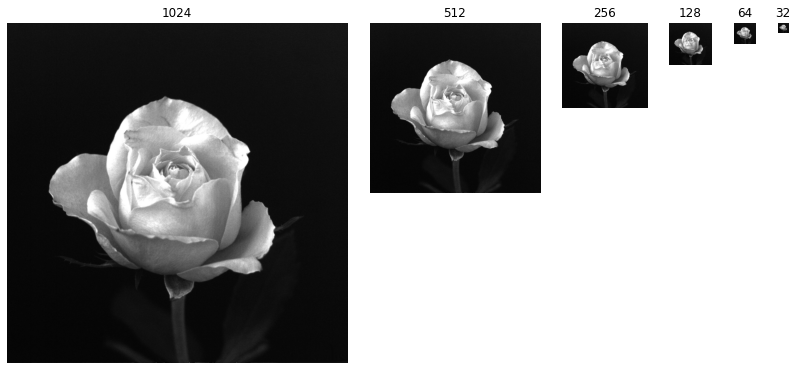

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=len(images), figsize=(14, 7), gridspec_kw={'width_ratios': [32,16,8,4,2,1]}, sharey=True)
for i in reversed(range(len(images))):
    axs[i].axis('off')
    axs[i].set_title(f'{32*2**(5-i)}')
    axs[i].imshow(images[i], cmap='gray')


A fin de poder observar de mejor manera el efecto de la decimación en las imagen, se procede a recuperar las imágenes en el tamaño original, replicando los píxeles para reemplazar a los que fueron retirados previamente.

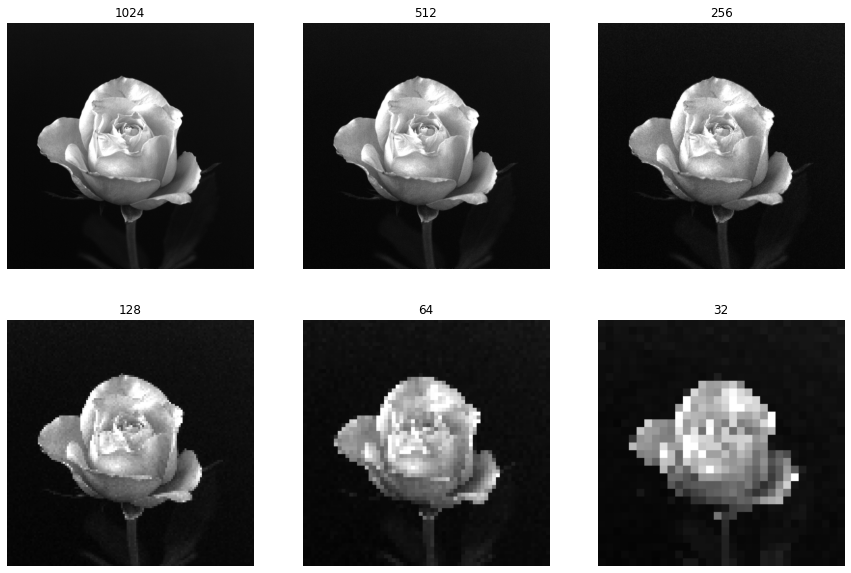

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i in reversed(range(len(images))):
    size = 32*2**(5-i)
    # Arreglo auxiliar para replicarl el pixel vecino al agrandar una imagen
    aux = np.arange(size).repeat(1024//size)
    axs[i//3,i%3].axis('off')
    axs[i//3,i%3].set_title(f'{size}')
    axs[i//3,i%3].imshow(images[i][aux[:,None], aux], cmap='gray')

De esta forma es posible observar como se degrada la imagen a medida que se subsamplea la misma, siendo notorio el efecto a partir del caso de 128x128

A continuación se propone mostrar dos imagenes de diferentes tamaños a fin de poder evidenciar el efecto visual que tienen distintos tamaños de píxeles

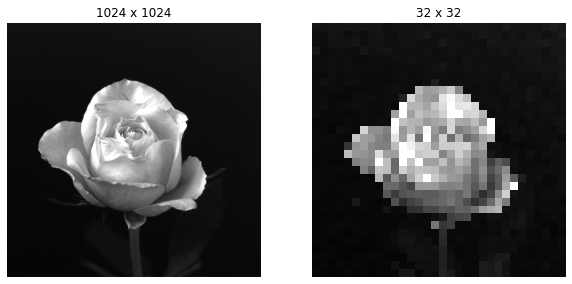

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

axs[0].axis('off')
axs[0].set_title(f'1024 x 1024')
axs[0].imshow(images[0], cmap='gray')

axs[1].axis('off')
axs[1].set_title(f'32 x 32')
axs[1].imshow(images[-1], cmap='gray')

Es posible observar que la imagen con mayor tamaño, y por lo tanto pixeles más chicos, se aprecia casi como continua debido a que el tamaño de los pixeles de la misma es menor a la resolución espacial del ojo, fenomeno que no ocurre con la imagen mas pequeña, en la cual los pixeles son distinguibles unos de otros

In [8]:
skull_image = np.array(Image.open('../../assets/ctskull.bmp'))

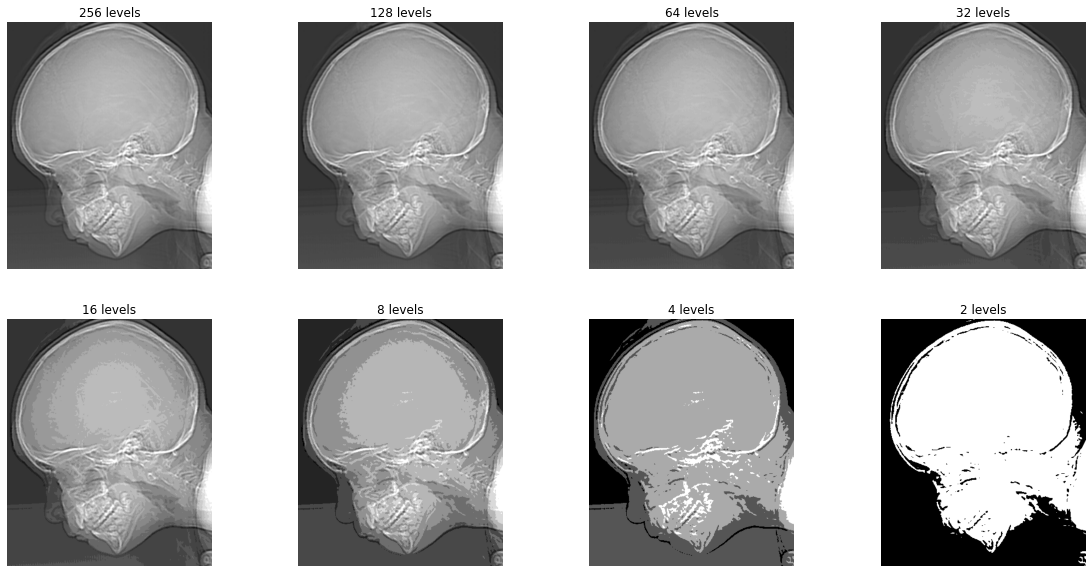

In [9]:
levels = [256, 128, 64, 32, 16, 8, 4, 2]
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
for i in range(len(levels)):
    n = levels[i]
    k = int(256//n)
    out = np.uint8((skull_image // k) / (n - 1) * 255)
    axs[i//4][i%4].axis('off')
    axs[i//4][i%4].set_title(f'{n} levels')
    axs[i//4][i%4].imshow(out, cmap='gray')
        

Finalmente variando los niveles de cuantización mientras se mantiene constante la resolución espacial, se puede apreciar como con menos de 64 niveles se empiezan a observar contornos en el interior del craneo, pero entre 256 y 64 no se aprecian diferencias significativas. 